In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import random
import math
import statistics as st
import numpy as np

Changes default figure size

In [3]:
plt.rcParams['figure.figsize']=13,8

### Define Functions

In [4]:
def flip_coin():
    return random.choice(["H","T"])

In [5]:
def flip_coin_lots(n=2**16):
    intervals = {}
    heads = 0.1
    tails = 0.1
    for i in range(1,n+1):
        flip = flip_coin()
        if flip =="H":
            heads += 1
        elif flip == "T":
            tails += 1
        else:
            raise ValueError("")
        if math.log2(i).is_integer():
            intervals[i] = {'heads':heads,'tails':tails}
    if n not in intervals:
        intervals[n] = {'heads':heads,'tails':tails}
    return intervals
        

In [6]:
def fast_flip_lots(flips_per_sample, number_of_samples):
    temp_data = np.random.choice(['H','T'],(flips_per_sample,number_of_samples))
    heads = np.sum(temp_data == "H",axis =0)
    tails = np.sum(temp_data == "T", axis = 0)
    return {'heads':list(heads),'tails':list(tails)}

In [7]:
def geo_mean(items):
    exponent = 1/len(items)
    return     np.product(items) ** exponent

### Generate Data

In [8]:
data = flip_coin_lots()

In [9]:
x_vals = list(data.keys())
x_vals.sort()

In [10]:
repetition_data = []
for i in range(20):
    repetition_data.append(flip_coin_lots())


In [11]:
hundred_flips = fast_flip_lots(100,100000)
hundred_flips_ratio = [hundred_flips['heads'][x] / hundred_flips['tails'][x] for x in range(100000)]


In [12]:
thousand_flips = fast_flip_lots(1000,100000)
thousand_flips_ratio = [thousand_flips['heads'][x] / thousand_flips['tails'][x] for x in range(100000)]

### Create Charts

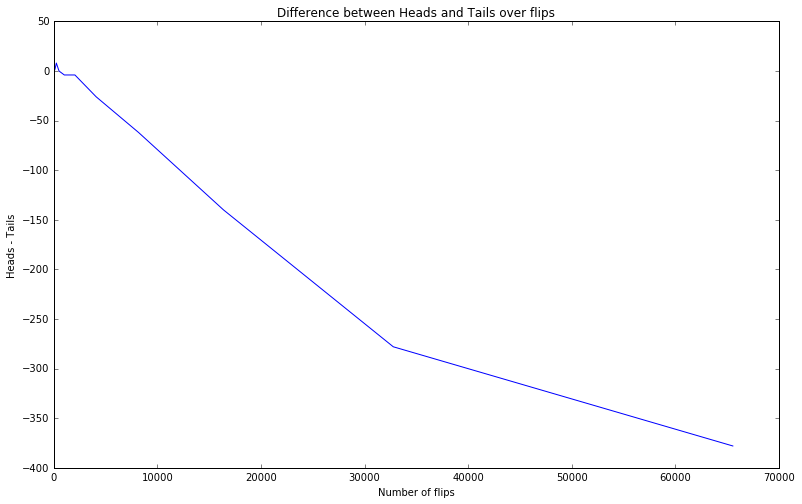

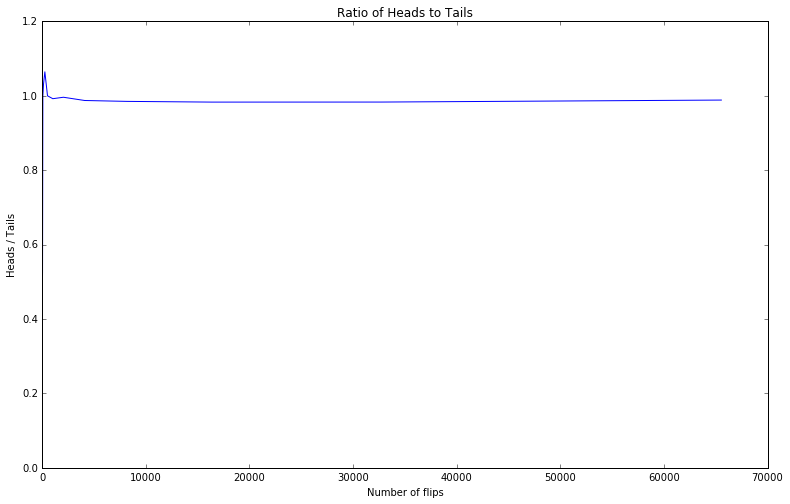

In [13]:

plt.plot(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])

plt.xlabel('Number of flips')
plt.ylabel('Heads - Tails')
plt.title('Difference between Heads and Tails over flips')
plt.show()
plt.plot(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.xlabel('Number of flips')
plt.ylabel('Heads / Tails')
plt.title("Ratio of Heads to Tails")
plt.show()

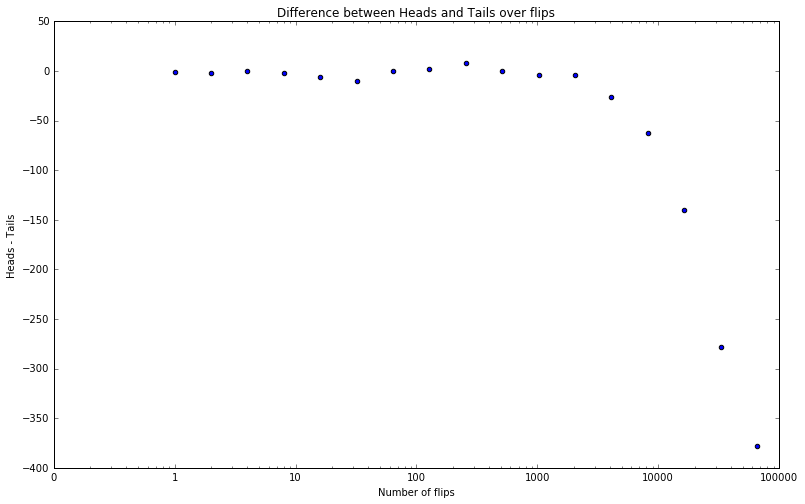

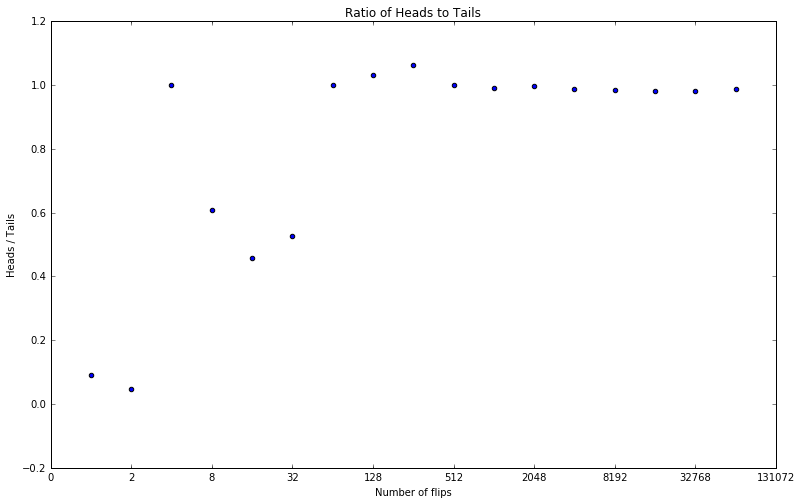

In [14]:
_,ax = plt.subplots()
plt.scatter(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])
plt.xscale('log', basex = 10)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of flips')
plt.ylabel('Heads - Tails')
plt.title('Difference between Heads and Tails over flips')
plt.show()
_,ax = plt.subplots()
plt.scatter(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.xscale('log', basex = 2)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of flips')
plt.ylabel('Heads / Tails')
plt.title("Ratio of Heads to Tails")
plt.show()

Clearly as the number of flips increases the absolute difference between the number Heads and Tails becomes more volatile while the ratio of the 2 becomes more stable. This is likely because as the number of flips grows a small percentage difference between Heads and Tails consists of a larger absolute difference. The next chart shows this relationship

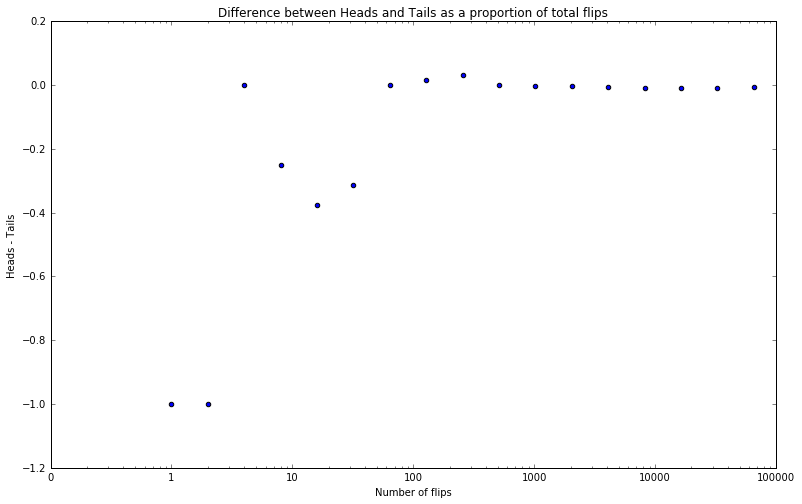

In [21]:
_,ax = plt.subplots()
plt.scatter(x_vals,[(data[x]['heads'] - data[x]['tails'])/x for x in x_vals])
plt.xscale('log', basex = 10)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of flips')
plt.ylabel('Heads - Tails')
plt.title('Difference between Heads and Tails as a proportion of total flips')
plt.show()

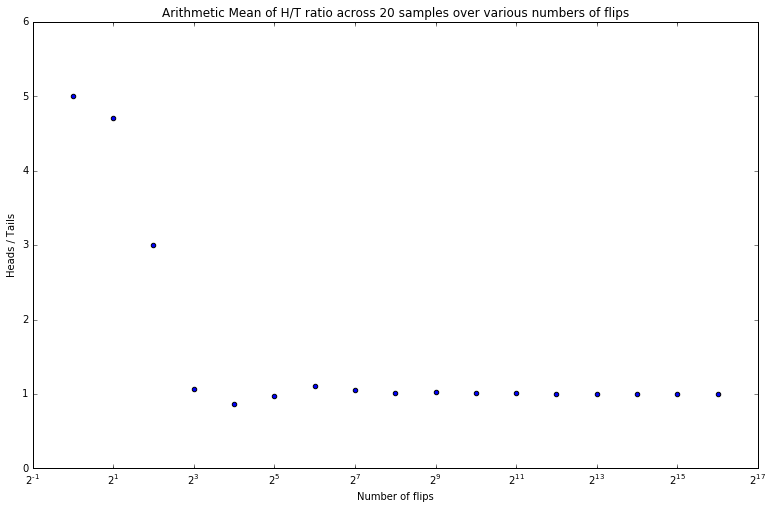

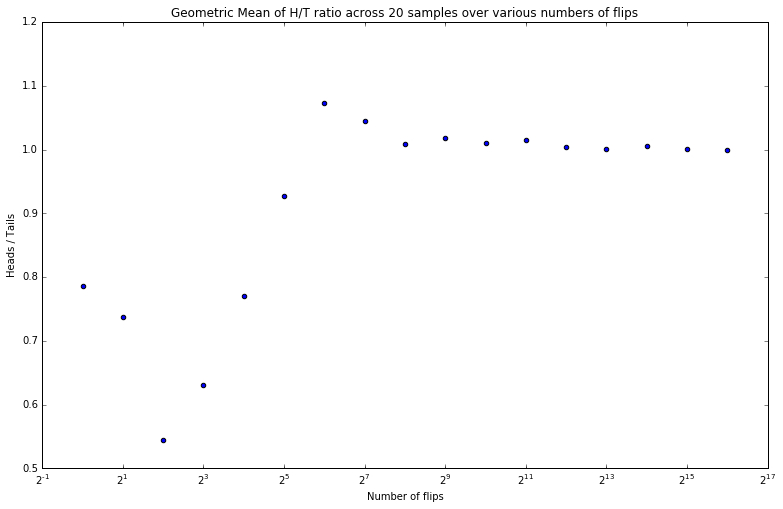

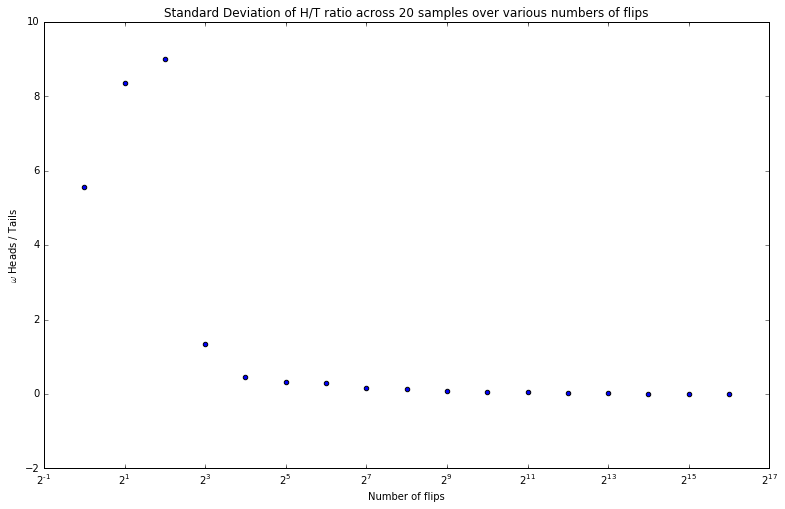

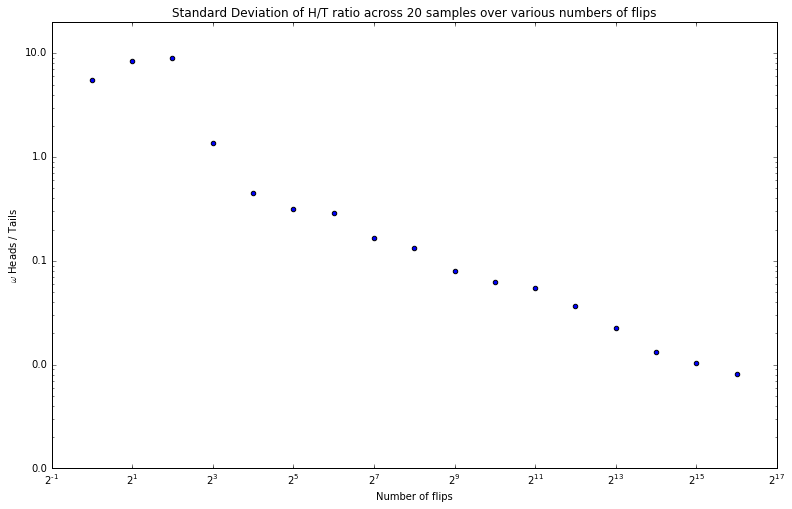

In [15]:

plt.scatter(x_vals,[st.mean([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log',basex = 2)
plt.xlabel("Number of flips")
plt.ylabel("Heads / Tails")
plt.title("Arithmetic Mean of H/T ratio across 20 samples over various numbers of flips")
plt.show()
plt.scatter(x_vals,[geo_mean([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log',basex = 2)
plt.xlabel("Number of flips")
plt.ylabel("Heads / Tails")
plt.title("Geometric Mean of H/T ratio across 20 samples over various numbers of flips")
plt.show()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log',basex = 2)
plt.xlabel("Number of flips")
plt.ylabel("$\omega$ Heads / Tails")
plt.title("Standard Deviation of H/T ratio across 20 samples over various numbers of flips")
plt.show()
_,ax = plt.subplots()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log',basex = 2)
plt.xlabel("Number of flips")
plt.ylabel("$\omega$ Heads / Tails")
plt.title("Standard Deviation of H/T ratio across 20 samples over various numbers of flips")
plt.ylim(.001,20)
plt.yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.show()

These charts provide more evidence of increasing stability with greater sample sizes. The means change less and less as the size of the sample grow and the standard deviation decreases almost linearly on a log:log scale.

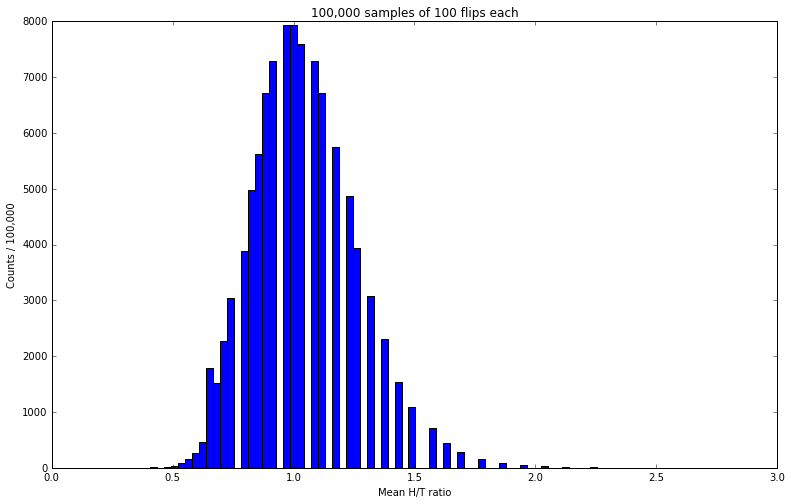

In [16]:
_, hundred_bins, __ = plt.hist(hundred_flips_ratio, bins = 75)
plt.ylabel('Counts / 100,000')
plt.xlabel('Mean H/T ratio')
plt.title("100,000 samples of 100 flips each")
plt.show()

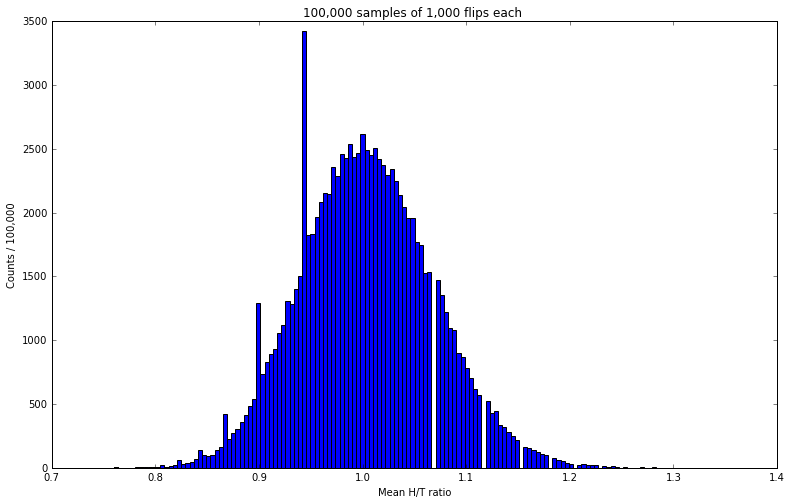

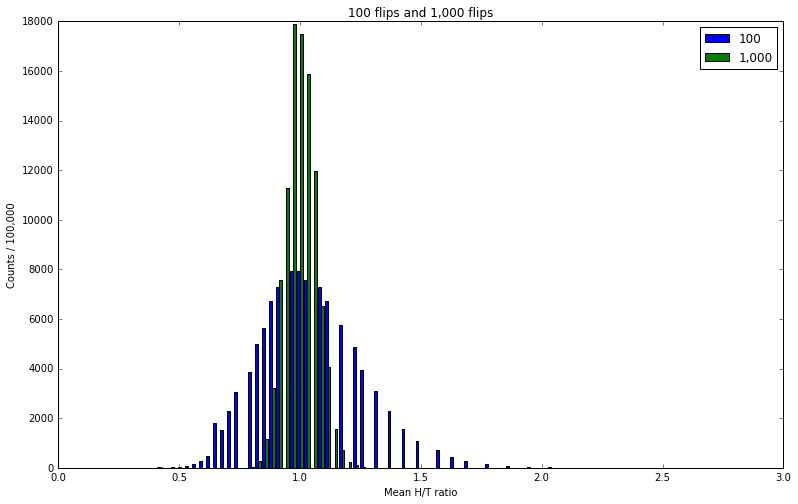

In [17]:
plt.hist(thousand_flips_ratio, bins = 150)
plt.title('100,000 samples of 1,000 flips each ')
plt.xlabel('Mean H/T ratio')
plt.ylabel('Counts / 100,000')
plt.show()
_,ax = plt.subplots()
plt.hist([hundred_flips_ratio,thousand_flips_ratio], bins = 75)
plt.title('100 flips and 1,000 flips')
plt.xlabel('Mean H/T ratio')
plt.ylabel('Counts / 100,000')
ax.legend(["100","1,000"])
plt.show()

The histograms further reinforce the increased stability with greater sample size. They combine visualization of the mean and standard deviation, to show that larger samples give you a tigheter estimat of the mean without shifting the mean away from 1.

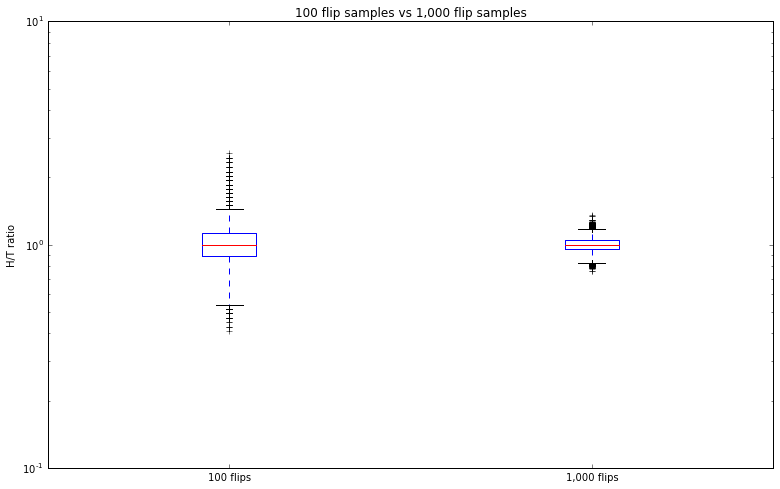

In [18]:
plt.boxplot([hundred_flips_ratio, thousand_flips_ratio])
plt.yscale('log')
plt.xticks([1,2],['100 flips','1,000 flips'])
plt.title("100 flip samples vs 1,000 flip samples")
plt.ylabel("H/T ratio")
plt.show()

These two samples of H/T ratios are clearly not drawn from the same population though it seems certain that the means of the 2 populations are very close. 